In [1]:
from cluster_sf.integrals import eps, W
from cluster_sf.constants import center_coord, angular_scale, kmin, kmax
from astropy.table import Table
import argparse
from cluster_sf.bins import make_bins
import numpy as np
import sys
import matplotlib.pyplot as plt

In [2]:
sys.argv = [""]

In [3]:
parser = argparse.ArgumentParser()
parser.add_argument("prefix", type=str)
parser.add_argument("--edgesfile", type=str)

args = parser.parse_args(["two_pts"])

prefix = args.prefix
edgesfile = args.edgesfile
regfile = f"{prefix}.reg"
if edgesfile is None:
    edges = None
else:
    edges = np.loadtxt(edgesfile)


In [4]:
regs, seps, bins, bin_idxs, bins_used, edges = make_bins(regfile, edges=edges)


num_seps =  10  len_bins =  10


In [5]:
radii = np.array(
    [
        reg.center.separation(center_coord).to_value("arcmin") * angular_scale.value
        for reg in regs
    ]
)
widths = np.array([(reg.width*angular_scale).to_value("Mpc") for reg in regs])

In [6]:
k_bins = np.linspace(kmin, kmax, 1001)
kmid = 0.5*(k_bins[1:]+k_bins[:-1])

In [7]:
bin_idxs

defaultdict(list,
            {0: [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)],
             1: [(0, 4), (1, 4), (2, 4), (3, 4)]})

In [8]:
sky_funcs = {}
for key, idxs in bin_idxs.items():
    func = 0.0
    for i, j in idxs:
        func += (eps(kmid, radii[i])*W(kmid, widths[i])-eps(kmid, radii[j])*W(kmid, widths[j]))**2
    func /= len(idxs)
    sky_funcs[key] = func
 

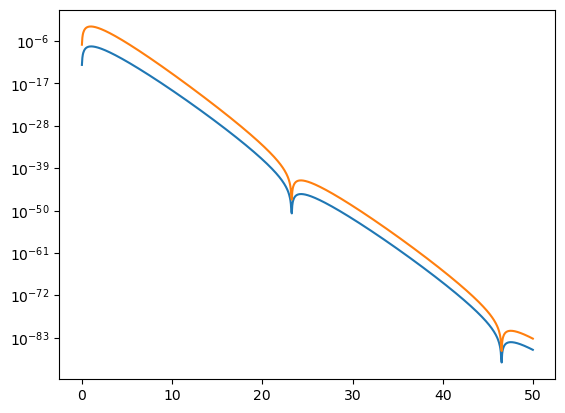

In [11]:
plt.figure()
plt.plot(kmid, sky_funcs[0])
plt.plot(kmid, sky_funcs[1])
plt.yscale("log")

In [13]:
t1 = Table({"radii": radii, "widths": widths})
t1.write(f"{prefix}_radii_widths.dat", format="ascii.commented_header", overwrite=True)
t2 = Table({f"bin_{k}": v for k, v in sky_funcs.items()})
t2.write(f"{prefix}_sf_sky_funcs.dat", format="ascii.commented_header", overwrite=True)